# **Electric Vehicle Price Prediction Using SVM**

---

Here, I used **Support Vector Machine(SVM)** to work on the 'Electric Vehicle Data' dataset from Kaggle.

**The SVM model should be able to answer the question, "This is my car's model & make, along with a few other parameters, what price can this vehicle be brought or sold?"**

So, after building and training the SVM model on the training set, I assessed my model performance on the test set using relevant evaluation metrics.

---

In [ ]:
# Suppressing Warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing Libraries for Data Manipulation and Visualization
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

# Importing Libraries for Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Visualization Settings
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
plt.rcParams['figure.figsize'] = [10, 6]

In [ ]:
# Loading the Dataset
df = pd.read_csv("Electric_cars_dataset.csv", encoding="latin-1")

In [ ]:
# Dataset Exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64353 entries, 0 to 64352
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 64353 non-null  object 
 1   VIN (1-10)                                         64353 non-null  object 
 2   County                                             64349 non-null  object 
 3   City                                               64344 non-null  object 
 4   State                                              64342 non-null  object 
 5   ZIP Code                                           64347 non-null  float64
 6   Model Year                                         64346 non-null  float64
 7   Make                                               64349 non-null  object 
 8   Model                                              64340 non-null  object 
 9   Electr

In [ ]:
df.head()

,ID,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,Expected Price ($1k)
0,EV33174,5YJ3E1EC6L,Snohomish,LYNNWOOD,WA,98037.0,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,32.0,109821694,POINT (-122.287614 47.83874),PUGET SOUND ENERGY INC,50
1,EV40247,JN1AZ0CP8B,Skagit,BELLINGHAM,WA,98229.0,2011.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,40.0,137375528,POINT (-122.414936 48.709388),PUGET SOUND ENERGY INC,15
2,EV12248,WBY1Z2C56F,Pierce,TACOMA,WA,98422.0,2015.0,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81,0,27.0,150627382,POINT (-122.396286 47.293138),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,18
3,EV55713,1G1RD6E44D,King,REDMOND,WA,98053.0,2013.0,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,45.0,258766301,POINT (-122.024951 47.670286),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),33.9
4,EV28799,1G1FY6S05K,Pierce,PUYALLUP,WA,98375.0,2019.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,25.0,296998138,POINT (-122.321062 47.103797),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,41.78


In [ ]:
df.describe()

,ZIP Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID
count,64347.000000,64346.000000,64353.000000,64353.000000,64184.000000,6.435300e+04
mean,98143.452888,2018.186212,106.948985,2524.990754,29.951904,1.972905e+08
std,2856.064329,2.726742,104.093919,12402.895104,14.661124,1.069466e+08
min,745.000000,1993.000000,0.000000,0.000000,0.000000,4.385000e+03
25%,98052.000000,2017.000000,14.000000,0.000000,19.000000,1.372865e+08
50%,98121.000000,2018.000000,73.000000,0.000000,34.000000,1.753776e+08
75%,98370.000000,2021.000000,215.000000,0.000000,43.000000,2.299039e+08
max,99701.000000,2022.000000,337.000000,845000.000000,49.000000,4.789346e+08


In [ ]:
# Generating Profiling Report
profile = ProfileReport(df, title="Electric Cars Dataset Report", explorative=True)
profile.to_file("Electric_Cars_Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 18/18 [00:05<00:00,  3.22it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Handling Missing Values
missing_vals = df.isnull().sum()
print("Missing Values:\n", missing_vals)

Missing Values:
 ID                                                     0
VIN (1-10)                                             0
County                                                 4
City                                                   9
State                                                 11
ZIP Code                                               6
Model Year                                             7
Make                                                   4
Model                                                 13
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 169
DOL Vehicle ID                                         0
Vehicle Location                                     510
Electric Utility                                     722
Expected Price

In [ ]:
# Converting target to numeric and replacing invalid values
df['Expected Price ($1k)'] = df['Expected Price ($1k)'].replace("N/", "0").astype(float)

In [ ]:
# Filling missing categorical columns with 'Unknown'
missing_cat_cols = ['County', 'City', 'State', 'ZIP Code', 'Make', 'Model', 'Electric Utility']
df[missing_cat_cols] = df[missing_cat_cols].fillna("Unknown")

In [ ]:
# Dropping rows with missing values in important numeric/location-based columns
cols_missing_rows = ['Model Year', 'Legislative District', 'Vehicle Location']
df.dropna(subset=cols_missing_rows, inplace=True)

In [ ]:
# Outlier Detection and Removal
col = 'Expected Price ($1k)'
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
print(f"Column: {col}, Outliers: {outliers}")

df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]      # To remove outliers from the price column

Column: Expected Price ($1k), Outliers: 394


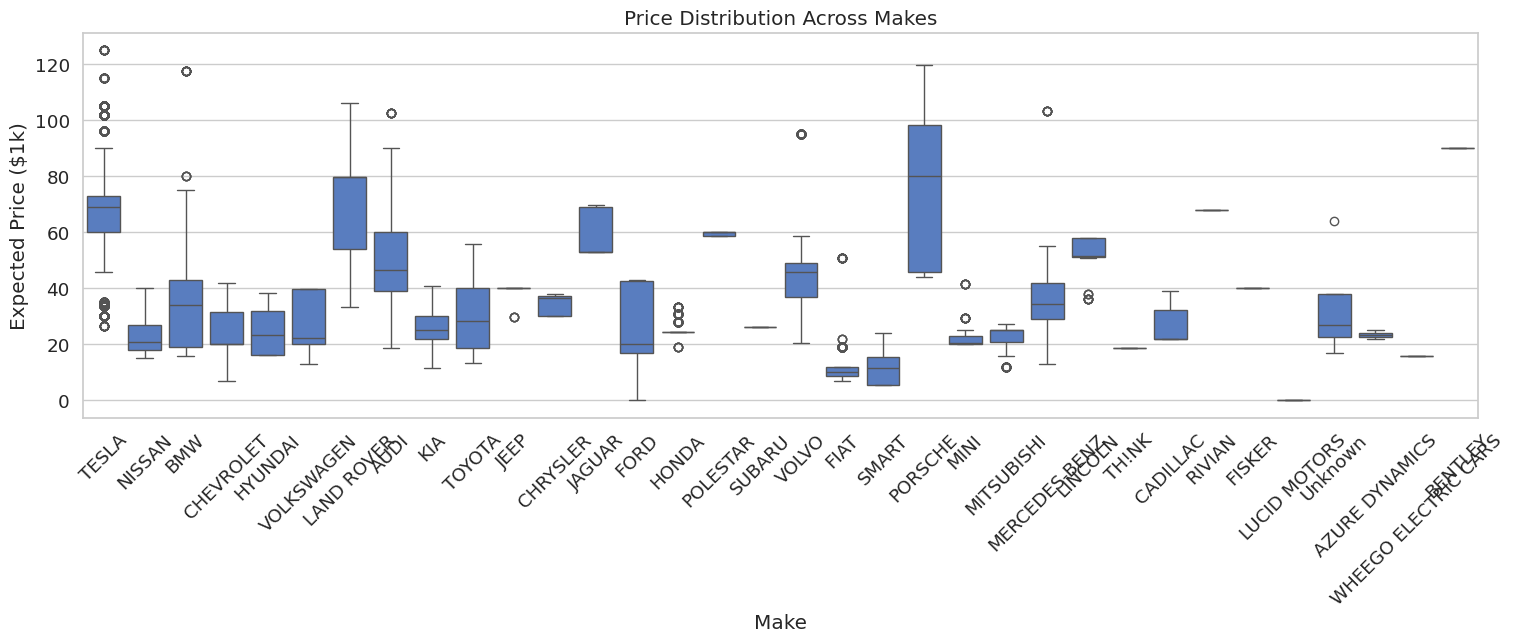

In [ ]:
# Boxplot Visualization
plt.figure(figsize=(18, 5))
sns.boxplot(x='Make', y='Expected Price ($1k)', data=df)
plt.title('Price Distribution Across Makes')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Encoding Categorical Features Using One-Hot Encoding
cat_cols = ['Make', 'County', 'City', 'Model', 'Electric Vehicle Type',
            'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Utility']
df = pd.get_dummies(df, columns=cat_cols)

In [ ]:
# Feature Selection
X = df.drop(columns=['Expected Price ($1k)', 'VIN (1-10)', 'ID', 'State', 'ZIP Code', 'DOL Vehicle ID', 'Vehicle Location'])
y = df['Expected Price ($1k)']

In [ ]:
# Displaying feature and target shapes
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (63277, 673)
Target shape: (63277,)


In [ ]:
# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")

Training set: (50621, 673), (50621,)
Testing set: (12656, 673), (12656,)


In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

svr_model = SVR(C=10, kernel='rbf')
svr_model.fit(X_train_pca, y_train)

SVR(C=10)

**Principal Component Analysis (PCA)** with 50 components was used to reduce the dimensionality of the dataset before training the Support Vector Regressor model.

This was done to significantly speed up training while retaining most of the variance in the dataset features.

In [ ]:
svm_ypred = svr_model.predict(X_test_pca)

In [ ]:
# Evaluation of SVM Model
rmse_svr = np.sqrt(mean_squared_error(y_test, svm_ypred))
print("SVM RMSE:", rmse_svr)

print("SVM R2 Score:", r2_score(y_test, svm_ypred))

SVM RMSE: 9.130821554363179
SVM R2 Score: 0.8419378716956984


### **Interpretation**

- **RMSE is approximately $9,130.**

This means that on average, the model's price predictions deviate from the actual values by roughly $9,130.

- **R² Score is 0.84.**

This means that the SVR model explains about 84% of the variance in electric vehicle price prediction. This is a strong result, indicating the model captures most of the key trends in the data.

### **Suggestion to Improve the SVR Model's Performance**

- Using PCA(n_components=0.95) to automatically select the number of components that retain 95% of variance may optimize the PCA further and improve the model's performance.